In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [7]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issues, the original features are replaced with V1, V2, … V28 columns which are the result of PCA transformation applied to the original ones.  
The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. 
Time: Number of seconds elapsed between this transaction and the first transaction in the dataset.
Amount: Transaction amount
Class: is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [8]:
# uncomment the first code line if you want to work on a smaller dataset first 
# comment for Final Run and run all the cells
data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

### Visualize all the features from the dataset on graphs

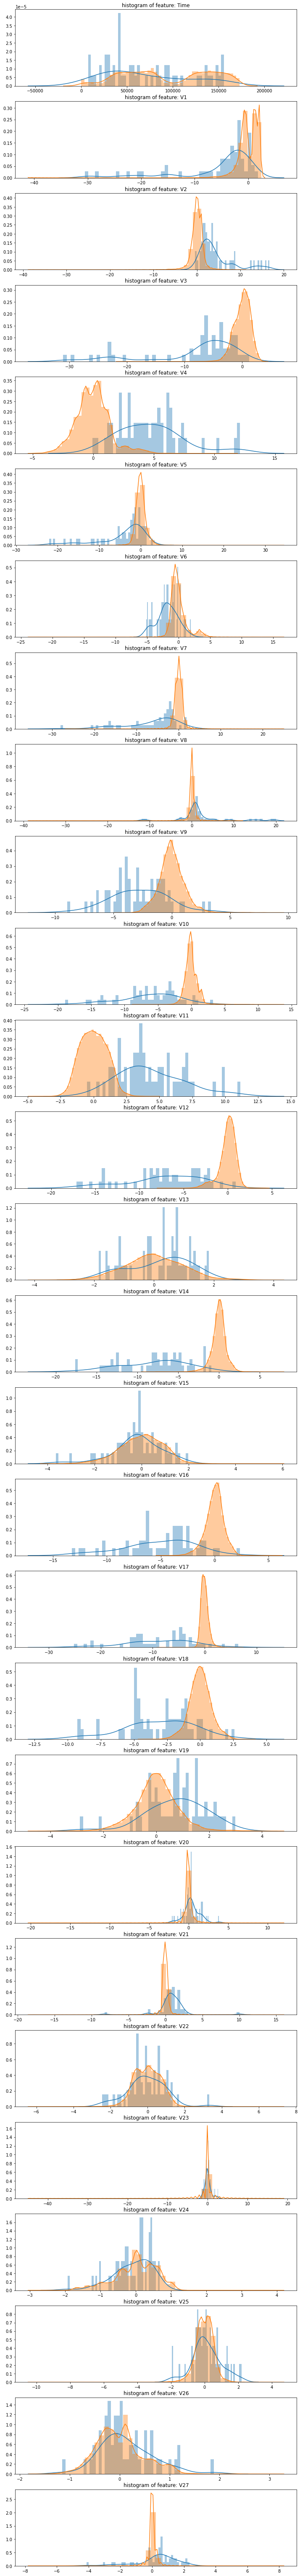

In [9]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

#### Separate the Fraudulent cases from the authentic ones and compare their occurrences in the dataset

In [10]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0019700967458223394
Fraud Cases: 56
Valid Transactions: 28425


#### Fraud is only 0.17% fraudulent transaction out all the transactions. This is a highly unbalenced dataset.

In [11]:
print("Amount details of fraudulent transaction")
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64

In [12]:
print("details of valid transaction")
Valid.Amount.describe()

details of valid transaction


count    28425.000000
mean        88.572094
std        234.229021
min          0.000000
25%          5.980000
50%         21.990000
75%         77.000000
max       6000.000000
Name: Amount, dtype: float64

#### Average Money transaction for the fraudulent ones are more

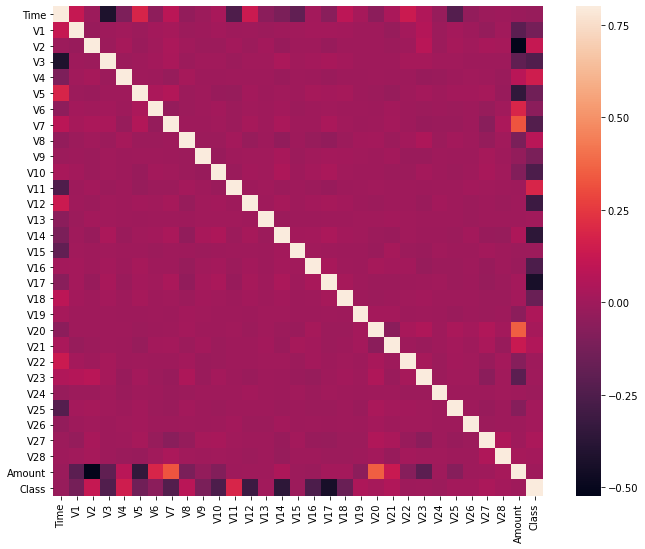

In [13]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

####  “V2” and “V5” are highly negatively correlated with the feature called “Amount”
#### Fair correlation with “V20” and “Amount”

### Data Modelling

In [14]:
#dividing the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data['Class']
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(28481, 30)
(28481,)


In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

#### Isolation Forest model
Isolation forest is generally used for Anomaly detection

In [16]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
 contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [17]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

### Model Evaluation

#### Confusion Matrix

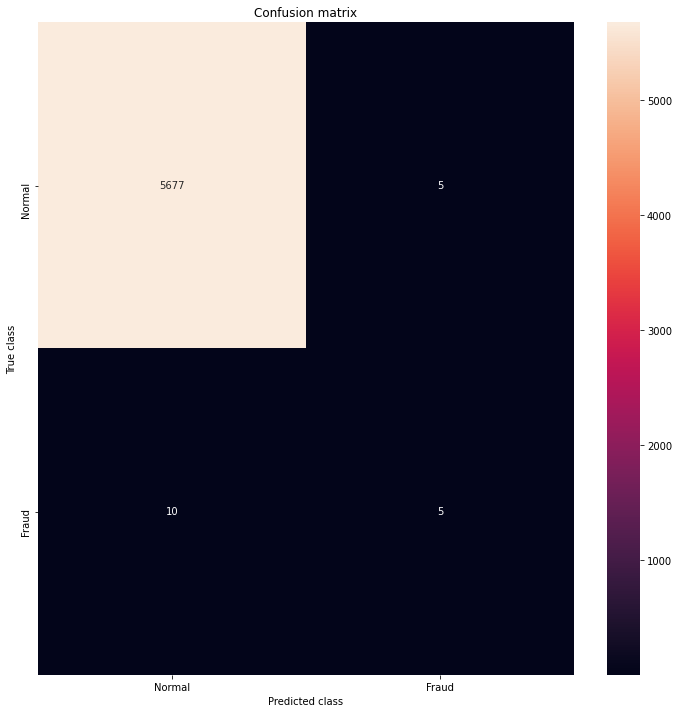

In [18]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Accuracy, Precision, Recall, F1-Score and the Matthews correlation coefficient

In [19]:
#evaluation of the model
#printing every score of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

n_outliers = len(Fraud)

print("the Model used is {}".format("Isolation Forest"))

acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))

prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))

rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))

f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))


the Model used is Isolation Forest
The accuracy is 0.9973670352817272
The precision is 0.5
The recall is 0.3333333333333333
The F1-Score is 0.4
The Matthews correlation coefficient is0.4069915183038882


#### Random Forest Decision Tree

In [20]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [21]:
#evaluation of the model
#printing every score of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

n_outliers = len(Fraud)

print("the Model used is {}".format("Isolation Forest"))

acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))

prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))

rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))

f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))


the Model used is Isolation Forest
The accuracy is 0.9992978760751272
The precision is 1.0
The recall is 0.7333333333333333
The F1-Score is 0.846153846153846
The Matthews correlation coefficient is0.8560475724861787


#### Recall of Decision Tree is much better than Isolation Forest

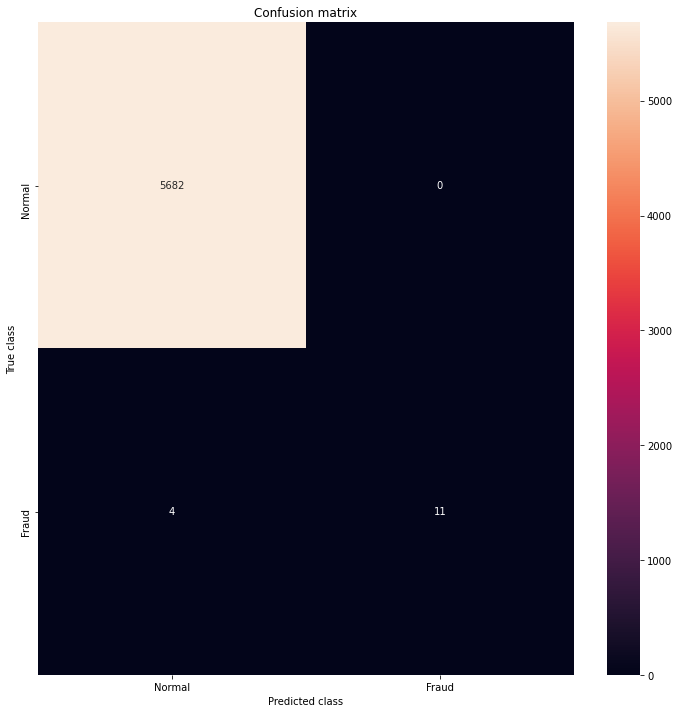

In [22]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Handling Sample bias

#### Over Sampling with Synthetic Minority Oversampling Technique (SMOTE)
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.

In [35]:
# import SMOTE module from imblearn library 
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0))) 
 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 41
Before OverSampling, counts of label '0': 22743 

After OverSampling, the shape of train_X: (45486, 30)
After OverSampling, the shape of train_y: (45486,) 

After OverSampling, counts of label '1': 22743
After OverSampling, counts of label '0': 22743


#### Applying Randon Forest to check recall on oversampled data

In [36]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
# predictions
y_pred = rfc.predict(X_test)

In [37]:
#evaluation of the model
#printing every score of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

n_outliers = len(Fraud)

print("the Model used is {}".format("Isolation Forest"))

acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))

prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))

rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))

f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is 0.9992978760751272
The precision is 0.9230769230769231
The recall is 0.8
The F1-Score is 0.8571428571428571
The Matthews correlation coefficient is0.858997635125019


#### Recall increased from 73% to 80%

#### Under Sampling using Near Miss Algorithm
It aims to balance class distribution by randomly eliminating majority class examples. 
To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

In [40]:
print("Before Undersampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, Y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 41
Before Undersampling, counts of label '0': 22743 

After Undersampling, the shape of train_X: (82, 30)
After Undersampling, the shape of train_y: (82,) 

After Undersampling, counts of label '1': 41
After Undersampling, counts of label '0': 41


#### Applying Randon Forest to check recall on undersampled data

In [43]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_miss,y_train_miss)
# predictions
y_pred = rfc.predict(X_test)

In [44]:
#evaluation of the model
#printing every score of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

n_outliers = len(Fraud)

print("the Model used is {}".format("Isolation Forest"))

acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))

prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))

rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))

f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is 0.9982446901878181
The precision is 0.6190476190476191
The recall is 0.8666666666666667
The F1-Score is 0.7222222222222222
The Matthews correlation coefficient is0.7316634896482421


#### Recall increased from 73% to 86% for Under Sampling
So for this data set, Under Sampling is a better choice

References: 
https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/